## <strong>Bắt đầu</strong>

Nhóm 15 - SE112.L12.KHCL
- Phan Khắc Cường - 18520548
- Nguyễn Anh Khoa - 18520922

  ![](https://i.postimg.cc/k445hYdx/logo-uit.png)

#**Đề bài**
Tảo biển sinh sản rất nhanh khi có môi trường thuận lợi với chúng và có những loài còn tiết ra môi trường những chất độc hại.

Một loại tảo nâu trong môi trường nước bị ô nhiễm nặng sinh sản theo quy luật sau:

- Ngày đầu tiên (ngày 0) có n cá thể ở mức 1,
- Ở mỗi ngày tiếp theo, mỗi cá thể mức i sinh ra i cá thể mức 1, các cá thể mới sinh sẽ sinh sôi, phát triển từ ngày hôm sau.
- Bản thân các cá thể mức $i$ phát triển thành mức $i+1$ và chu kỳ phát triển trong ngày chấm dứt.
Hãy xác định sau k ngày trong nước biển có bao nhiêu cá thể.

**Dữ liệu:** Vào từ thiết bị nhập chuẩn gồm một dòng chứa 2 số nguyên $n& và k (1 ≤ n ≤ 1000, 1 ≤ k ≤ 1^{18})$.

(test hiện tại chỉ có $k ≤ 10^5$,  thầy sẽ chấm lại sau khi nâng cấp test)

**Kết quả:** Đưa ra thiết bị xuất chuẩn một số nguyên – số lượng cá thể  tảo theo mô đun $10^9+7$.

**Ví dụ:**

| Input | Output |
| -:- | -: |
| 3 2 | 15 |

#Analysis:
- Gọi $A_i$ là số cá thể tổn tại xuất phát từ một cá thể ban đầu sau $i$ ngày, vì mức sinh sản các cá thể như nhau nên kết quả bài toán là $n*A_k$
- Ta có:
    - $A_1$ = 2
    - $A_2$ = 5
    - $A_3$ = 13
    - $A_4$ = 34
- Nhận thấy $A_i$ chính là phần tử thứ $2*i$ trong dãy số $Fibonacci$
- Bài toán được đưa về tính phần tử thứ $2*k$ trong dãy số $Fibonacci$

#Abstraction
Cho 2 số nguyên $n, k\ (n\le10^3, k\le 10^{18}$). tính $n*F(2k)$ với $F(i)$ là số  $Fibonacci$ thứ $i$. 

#Pattern Recognition
- Giải thuật quy hoạch động
- Đại số tuyến tính
- Chia để trị
- Fibonaci

#Algorithm Design

##1. Sử dụng giải thuật quy hoạch động
- Tạo mảng gồm $2*k$ phần tử, sử dụng công thức tính dãy $Fibonacci: F[i] = F[i-1] + F[i-2]$ để cập nhật mỗi vòng lặp.
- Có thể giảm thiểu bộ nhớ sử dụng bằng việc chỉ dùng 2 biến lưu 2 phần tử cuối cùng của dãy. Cập nhật mỗi vòng lặp $F_1, F_2 = F_2, F_1+F_2$

Độ phức tạp của giải thuật này là $O(k)$, giải thuật này không đáp ứng yêu cầu bài toán $(k\le10^{18})$

##2. Sử dụng phương pháp nhân ma trận kết hợp chia để trị và giải thuật Fibonaci.
- Chúng ta có thể tính dãy $Fibonacci$ thông qua phép nhân ma trận

$$\left[ \begin{array}{cc}
f_{n+2} & f_{n+1} \\
f_{n+1} & f_{n}
\end{array} \right] \times \left[ \begin{array}{cc}
1 & 1 \\
1 & 0
\end{array} \right] =\left[ \begin{array}{cc}
f_{n+3} & f_{n+2} \\
f_{n+2} & f_{n+1}
\end{array} \right]\
$$

- Do phép nhân ma trận có tính kết hợp nên ta có

$$\left[ \begin{array}{cc}
f_{n+2} & f_{n+1} \\
f_{n+1} & f_{n}
\end{array} \right] \times \left[ \begin{array}{cc}
1 & 1 \\
1 & 0
\end{array} \right]^k =\left[ \begin{array}{cc}
f_{n+2+k} & f_{n+1+k} \\
f_{n+1+k} & f_{n+k}
\end{array} \right]\
$$

- Cho nên $F_{n}$ được định nghĩa:
$$\left[ \begin{array}{cc}
1 & 1 \\
1 & 0
\end{array} \right]^n =\left[ \begin{array}{cc}
f_{n+2} & f_{n+1} \\
f_{n+1} & f_{n}
\end{array} \right]\
$$

- Để tính $A^k$

    - Với $k = 1: A^k = A$
    - Với $k\mod 2\ = 0:\  A^k = A^{k/2} * A^{k/2}$
    - Với $k\mod 2\ != 0: A^k = A^{k/2}*A^{k/2} *A $ 
    - Lặp lại cách tính với $A^{k/2}$

Với cách tính này chúng ta chỉ cần tính $A^{k/2}$ là có thể tính được $A^k$, (lặp cách tính đối với $A^{k/2}$). 

Chi phí tính toán giảm từ $O(k)$ xuống còn $O(logk)$ (thoả mãn bài toán)

##3. debugCode 

###Pseudocode


```
def pow(A,k):
    if k == 1 then return A
    T = pow(A,k//2)
    arr = T*T
    if k mod 2 == 0 then return arr
    else return arr*A

START
    input(n,k)
    initialize T =[[1,1],[1,0]]
    F = pow(T,2*k)
    print(F[0][0]*n)
END

```




#Analysis of the function
- Hàm $pow(A,n)$ để tính $A^n$ với $A$ là ma trận, $n$ là số nguyên dương.
- Hàm $multiply(A,B)$ để tính tích 2 ma trận $A*B$ với $A, B$ là ma trận có kích thước $2*2$

#Result
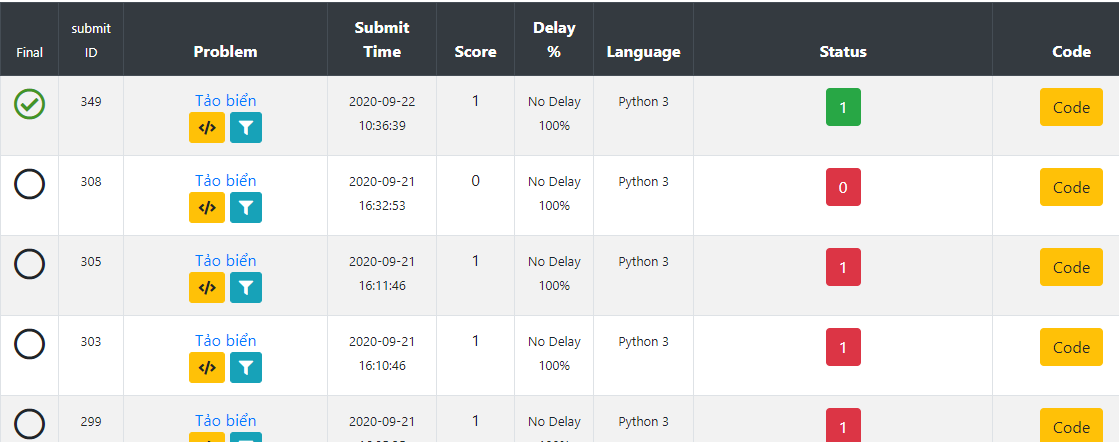

In [ ]:
#Codelearn.io/jiswoo
#Nhom 15 CS112.L12.KHCL

#Initialize mod
Mod = 10**9 + 7

# return result
def fibonaci(n):
    F = [[1, 1],
         [1, 0]]
    if (n == 0):
        return 0
    power(F, n - 1)

    return F[0][0]

#return matrix F*M
def multiply(F, M):
    global Mod
    x = (F[0][0] * M[0][0] % Mod +
         F[0][1] * M[1][0] % Mod) % Mod
    y = (F[0][0] * M[0][1] % Mod +
         F[0][1] * M[1][1] % Mod) % Mod
    z = (F[1][0] * M[0][0] % Mod +
         F[1][1] * M[1][0] % Mod) % Mod
    w = (F[1][0] * M[0][1] % Mod+
         F[1][1] * M[1][1] % Mod) % Mod

    F[0][0] = x
    F[0][1] = y
    F[1][0] = z
    F[1][1] = w


#return F^n
def power(F, n):

    if( n == 0 or n == 1):
        return;
    M = [[1, 1],
         [1, 0]];

    power(F, n // 2)
    multiply(F, F)

    if (n % 2 != 0):
        multiply(F, M)


n, k = map(int,input().split())
fib = fibonaci(2*k + 1)
arr = (n*fib) % Mod
print(arr)